# Phase 2 Results Analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from Test_Functions import plotsteps,plotreward,plotdata,ReadCSV,Hyperparameters
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
experiements = pd.read_csv('Final.csv')
experiements.details.fillna(value='n',inplace=True)
pd.options.display.max_columns=42

In [3]:
features

Index(['reply_size', 'layers', 'tau', 'optimizer', 'activation', 'batch_size',
       'exploration', 'vanish', 'gamma', 'rwrdschem', 'svision'],
      dtype='object')

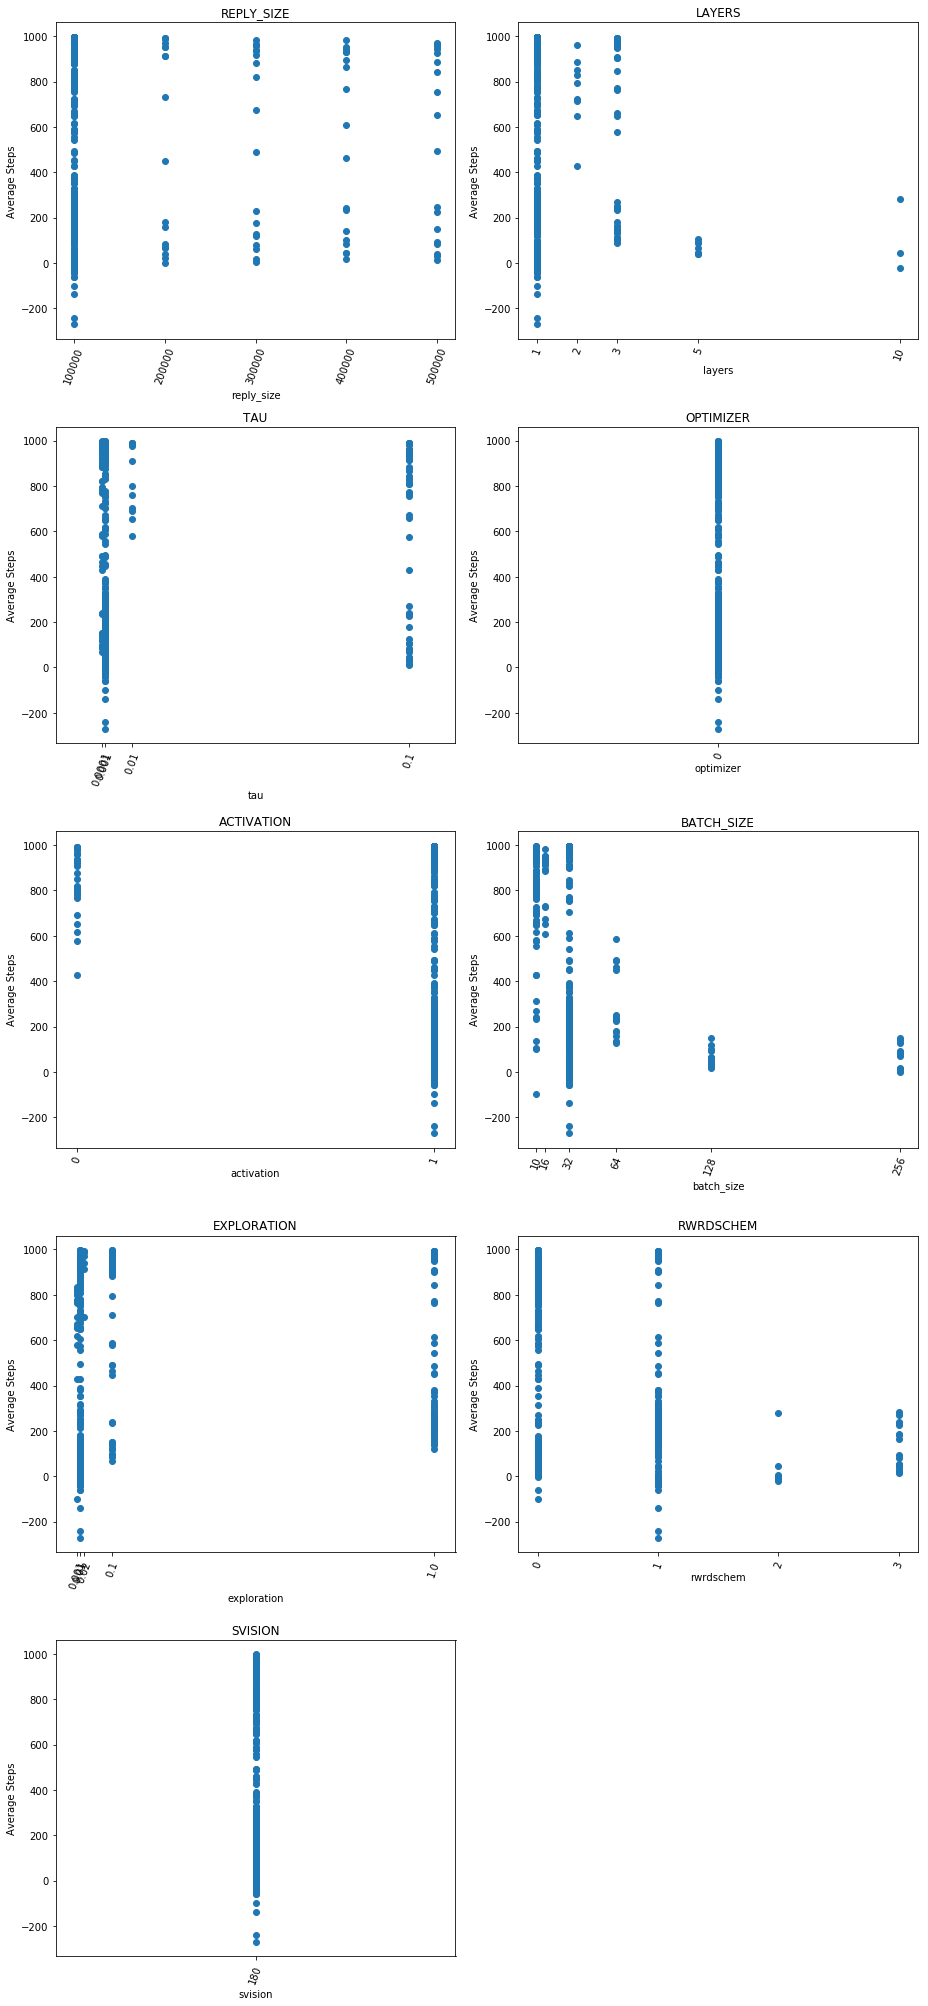

In [4]:
features = experiements.columns[[1,2,3,4,7,8,10,17,18]]
counter =1
plt.figure(figsize=(13,33))
for i in features:
    ax = plt.subplot(6,2,counter)
    counter+=1
    Hyperparameters(ax,i,experiements)
plt.tight_layout()

In [2]:
(experiements.tr_TT.sum()+experiements.ts_TT.sum())/3600/24

64.639641203703704

## Correlation between Training And testing
* <b>Steps: less better</b>
* <b>Reward: more better</b>

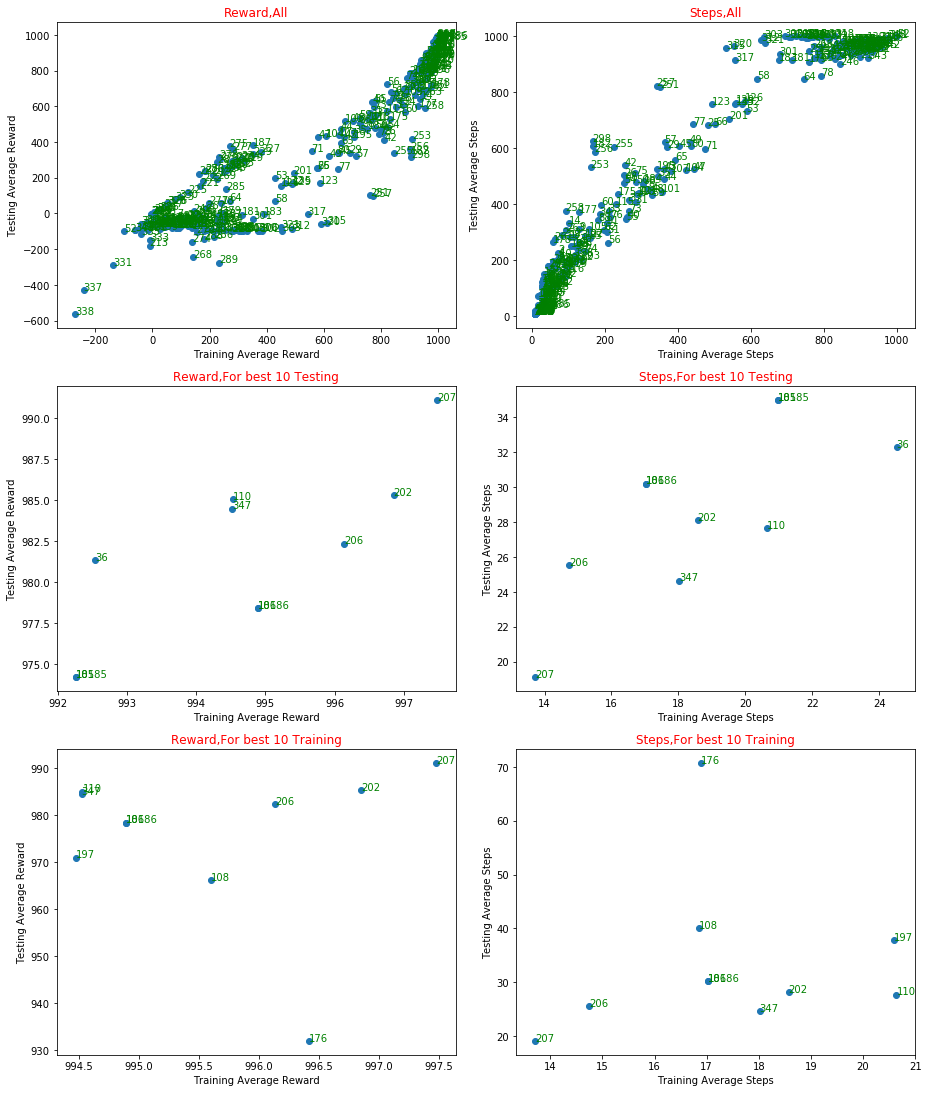

In [3]:
#experiements = experiements[experiements.experiment>68]
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']],'All'))
#Top 10 depending on Average Reward for test
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng in WantedScopes:
    
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt.tr_AR,tt.ts_AR)
    ax.set_title('Reward,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Reward')
    ax.set_ylabel('Testing Average Reward')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AR'],tt.iloc[i]['ts_AR']),color='green')
    ax = plt.subplot(6,2,counter)
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
    ax.scatter(tt.tr_AS,tt.ts_AS)
    ax.set_title('Steps,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Steps')
    ax.set_ylabel('Testing Average Steps')
    
    counter +=1
plt.tight_layout()
plt.show()

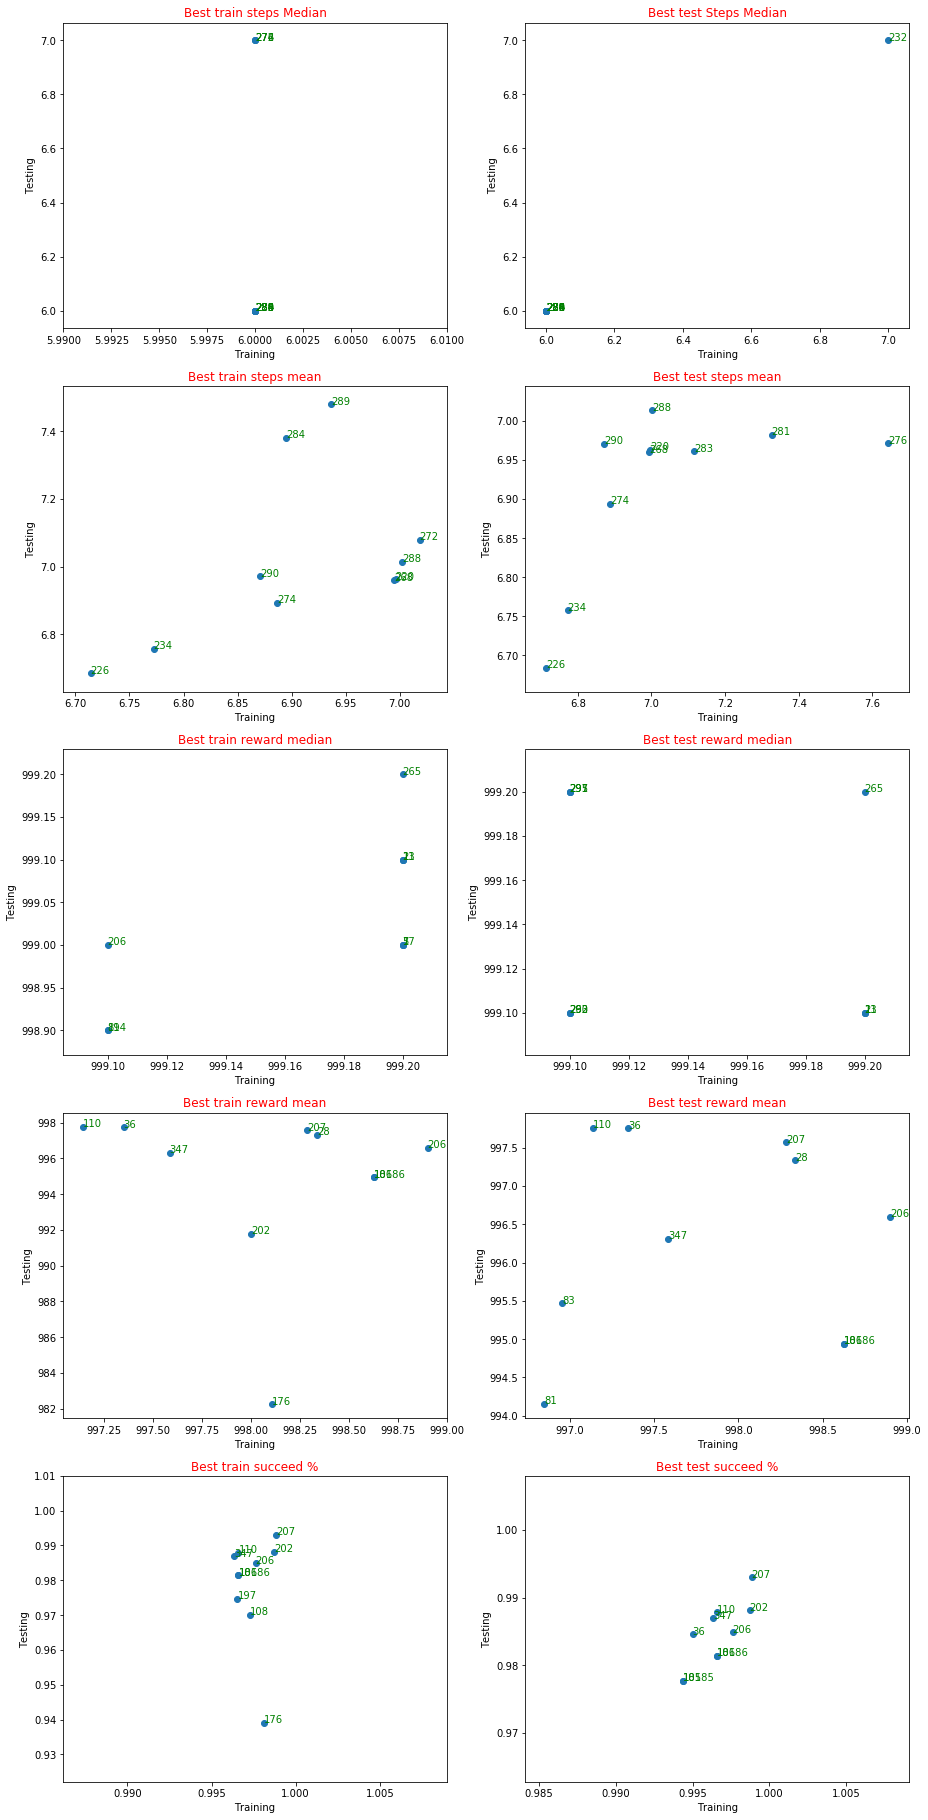

## Best Average Training Reward
* Each row represent the an experiement that contain at least 10K episode.

In [6]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_s', 'ts_s', 'tr_AR',
       'tr_AS', 'ts_AR', 'ts_AS', 'tr_SMD', 'tr_SM', 'tr_RMD', 'tr_RM',
       'ts_SMD', 'ts_SM', 'ts_RMD', 'ts_RM'],
      dtype='object')

In [7]:
wantedcolumns = experiements.columns[[0,1,2,3,5,7,8,9,10,13,14,16,19,20,21,24,28,29,30,31,32]]
#wantedcolumns = experiements.columns[[0,28,29]]
wantedcolumns

Index(['experiment', 'reply_size', 'layers', 'tau', 'advantage', 'activation',
       'batch_size', 'totalsteps', 'exploration', 'hidden_size',
       'train_repeat', 'seed', 'details', 'tr_count', 'tr_TR', 'ts_count',
       'tr_s', 'ts_s', 'tr_AR', 'tr_AS', 'ts_AR'],
      dtype='object')

## Best Average Testing Reward
* Each row represent the an experiement that contain at least 10K episode.

In [8]:
experiements.sort_values('ts_AR',ascending=False)[wantedcolumns].head()

,experiment,reply_size,layers,tau,advantage,activation,batch_size,totalsteps,exploration,hidden_size,train_repeat,seed,details,tr_count,tr_TR,ts_count,tr_s,ts_s,tr_AR,tr_AS,ts_AR
201,207,100000,1,0.001,max,1,32,2000000,0.01,100,1,1337,zombie agent,145916,145547980,14592,0.998849,0.993010,997.477864,13.707832,991.100055
196,202,100000,1,0.001,max,1,32,2000000,0.01,100,1,4444,zombie agent,107689,107350000,10769,0.998709,0.988114,996.852046,18.571999,985.304207
109,110,100000,1,0.001,max,1,32,1000000,0.01,100,1,4917,n,48454,48188998,4846,0.996595,0.987825,994.530854,20.638420,985.058399
341,347,100000,1,0.001,max,1,32,2000000,0.01,100,1,4917,"Multiplex Axel copy, 2 Frames.",111029,110420999,11103,0.996325,0.986940,994.523944,18.013366,984.476448
200,206,100000,1,0.001,max,1,32,2000000,0.01,100,1,1122,zombie agent,135688,135163999,13569,0.997612,0.984892,996.138192,14.739756,982.338713


# Full parameters Analysis

In [9]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_s', 'ts_s', 'tr_AR',
       'tr_AS', 'ts_AR', 'ts_AS', 'tr_SMD', 'tr_SM', 'tr_RMD', 'tr_RM',
       'ts_SMD', 'ts_SM', 'ts_RMD', 'ts_RM'],
      dtype='object')

## episode vs step
* The text above each two plots represent :
    * Experiment ID (1, 2 .....)
    * tau (0.1,0.01,0.001,0001)
    * advantage (naive , avg , max)
    * activation ( relu , tanh)
    * Exploration (0.1, 0.01, 0.001)
    * seed (1337 , 4917)
* Used colors in the plots
    * <b>blue</b> the line color
    * <b>Green</b> part is done in exploration
    * <b>Yellow</b> part is done without exploration

In [10]:
experiements[experiements.tr_count==experiements.tr_count.max()]

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,exploration,vanish,gamma,hidden_size,train_repeat,batch_norm,seed,rwrdschem,svision,details,tr_count,tr_TR,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_s,ts_s,tr_AR,tr_AS,ts_AR,ts_AS,tr_SMD,tr_SM,tr_RMD,tr_RM,ts_SMD,ts_SM,ts_RMD,ts_RM
201,207,100000,1,0.001,0,max,1000,1,32,2000000,0.01,0.75,0.99,100,1,False,1337,0,180,zombie agent,145916,145547980,12986,2000192,14592,14462132,1411,278680,0.998849,0.99301,997.477864,13.707832,991.100055,19.098136,10.0,11.439673,999.0,998.284107,11.0,12.871455,998.9,997.569213


In [2]:
experiements = experiements.sort_values('ts_AR',ascending=False).head(5).reset_index(drop=True)

In [ ]:
exp = pd.read_csv('207/exp_details.csv',header=None)
exp = exp[exp[7]=='Test']
exp = exp[exp[0]>13000]
exp = exp[exp[2]<-50]
exp

In [4]:
fff = experiements[experiements.experiment==275]
x = fff.shape[0]
y = 2
z=0
print(x,y,z)
plt.figure(figsize=(13,x))
for i in fff.experiment.as_matrix():
    txt = fff[fff.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=fff.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2

#plt.tight_layout()

0 2 0


42 2 0
207
202
110
347
206


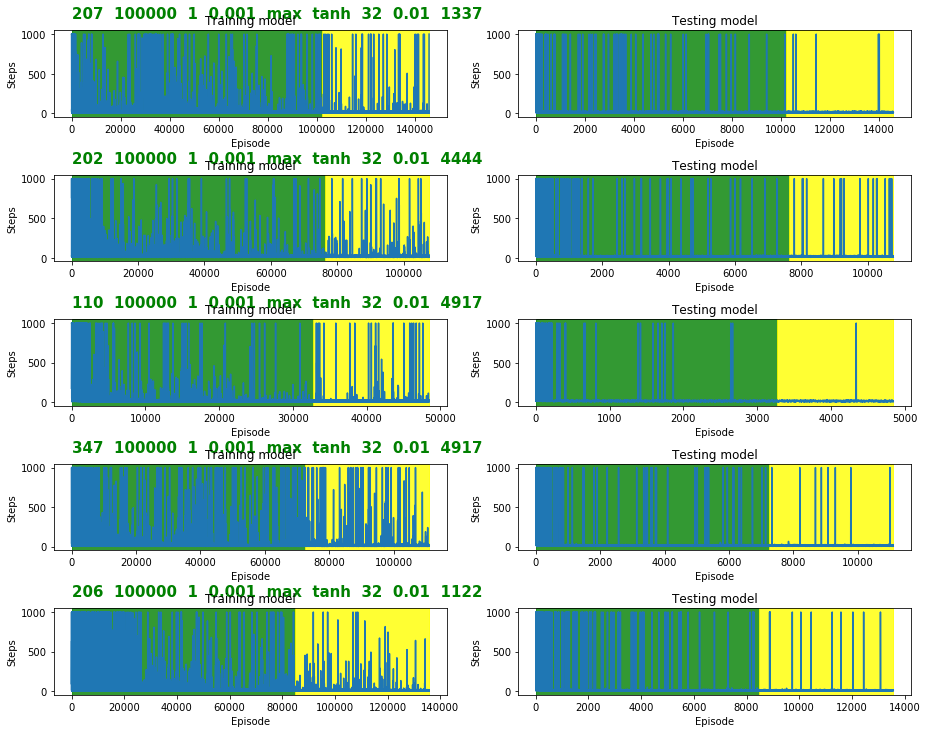

In [6]:
x = experiements.shape[1]
y = 2
z=0
print(x,y,z)
plt.figure(figsize=(13,x*2))
for i in experiements.experiment.as_matrix():
    print(i)
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()

## episode vs reward

In [3]:
experiements.head()

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,exploration,vanish,gamma,hidden_size,train_repeat,batch_norm,seed,rwrdschem,svision,details,tr_count,tr_TR,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_s,ts_s,tr_AR,tr_AS,ts_AR,ts_AS,tr_SMD,tr_SM,tr_RMD,tr_RM,ts_SMD,ts_SM,ts_RMD,ts_RM
0,1,100000,1,0.001,adam,naive,1000,relu,10,1000000,0.1,0.75,0.99,100,1,False,1337,"[-10, 1000, -0.1]",180,n,43726,43429000,6137,1000000,4373,4048794,1642,332053,0.995495,0.933455,993.207703,22.869689,925.861880,75.932541,8.0,13.331520,999.2,996.213907,9.0,24.546375,999.10,982.619989
1,2,100000,1,0.001,adam,naive,1000,relu,10,1000000,0.1,0.75,0.99,100,1,False,4917,"[-10, 1000, -0.1]",180,n,13917,13395999,6372,1000010,1392,1056377,1506,316222,0.969749,0.781609,962.563699,71.855285,758.891523,227.170977,10.0,83.472296,999.0,942.921128,11.0,172.223333,998.90,819.444333
2,3,100000,1,0.001,adam,naive,1000,tanh,10,1000000,0.1,0.75,0.99,100,1,False,1337,"[-10, 1000, -0.1]",180,n,14219,13718985,5244,1000147,1422,1115759,1418,292401,0.971869,0.805204,964.834728,70.338772,784.640647,205.626582,12.0,167.225936,998.8,878.330882,13.0,255.786667,998.70,727.754667
3,4,100000,1,0.001,adam,naive,1000,tanh,10,1000000,0.1,0.75,0.99,100,1,False,4917,"[-10, 1000, -0.1]",180,n,13551,13030987,5193,1000128,1356,1039989,1430,300105,0.969006,0.789086,961.625489,73.804738,766.953540,221.316372,13.0,155.606832,998.7,895.619441,13.5,255.611111,998.65,727.525309
4,5,100000,1,0.001,adam,avg,1000,relu,10,1000000,0.1,0.75,0.99,100,1,False,1337,"[-10, 1000, -0.1]",180,n,20653,20188958,5901,1000411,2066,1730827,1562,321727,0.982375,0.853340,977.531497,48.439016,837.767183,155.724589,8.0,25.357621,999.2,989.154550,10.0,59.431174,999.00,944.461741


207
102205
265
96698
297
45234


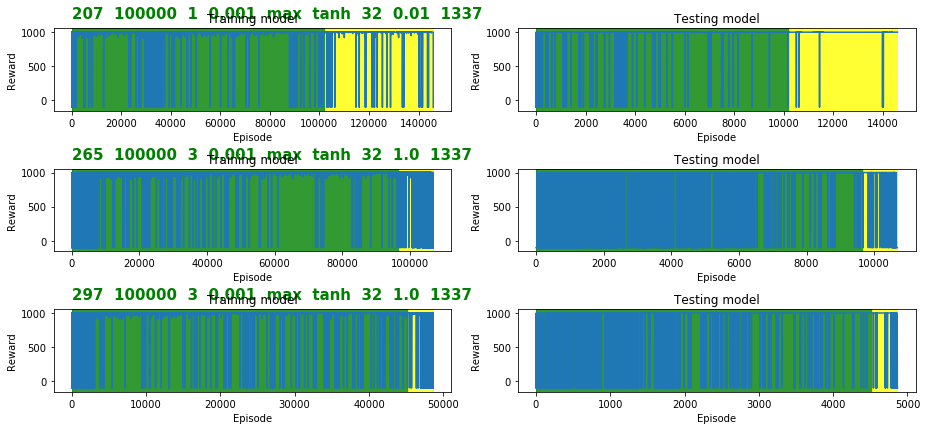

In [17]:
expp=experiements[(experiements.experiment==297)|(experiements.experiment==265)|(experiements.experiment==207)]
x = expp.shape[0]
y = 2
z=0
plt.figure(figsize=(13,x*2))
for i in expp.experiment.as_matrix():
    print(i)
    txt = expp[expp.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=expp.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotreward(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()
plt.savefig('pic.png')

### This code used for the last 25% (training,testing) (reward,steps) (mean,median)

In [ ]:
#experiements = experiements[experiements.experiment>68]
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
tmp = experiements[['experiment','tr_SMD', 'tr_SM', 'tr_RMD', 'tr_RM','ts_SMD', 'ts_SM', 'ts_RMD', 'ts_RM','tr_s','ts_s']]
#tmp = tmp.assign(tr_SMD=minmax_scale(tmp.tr_SMD),ts_SMD=minmax_scale(tmp.ts_SMD))
#Steps median
WantedScopes.append((tmp.sort_values('tr_SMD',ascending=True).head(10),'Best train steps Median','tr_SMD','ts_SMD'))
WantedScopes.append((tmp.sort_values('ts_SMD',ascending=True).head(10),'Best test Steps Median','tr_SMD','ts_SMD'))
#Steps Mean
WantedScopes.append((tmp.sort_values('tr_SM',ascending=True).head(10),'Best train steps mean','tr_SM','ts_SM'))
WantedScopes.append((tmp.sort_values('ts_SM',ascending=True).head(10),'Best test steps mean','tr_SM','ts_SM'))
#Reward Median
WantedScopes.append((tmp.sort_values('tr_RMD',ascending=False).head(10),'Best train reward median','tr_RMD','ts_RMD'))
WantedScopes.append((tmp.sort_values('ts_RMD',ascending=False).head(10),'Best test reward median','tr_RMD','ts_RMD'))
#Reward Mean
WantedScopes.append((tmp.sort_values('tr_RM',ascending=False).head(10),'Best train reward mean','tr_RM','ts_RM'))
WantedScopes.append((tmp.sort_values('ts_RM',ascending=False).head(10),'Best test reward mean','tr_RM','ts_RM'))
#
WantedScopes.append((tmp.sort_values('tr_s',ascending=False).head(10),'Best train succeed %','tr_s','ts_s'))
WantedScopes.append((tmp.sort_values('ts_s',ascending=False).head(10),'Best test succeed %','tr_s','ts_s'))

#Top 10 depending on Average Reward for test
#WantedScopes.append((tmp.sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
# WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng,x1,x2 in WantedScopes:
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt[x1],tt[x2])
    ax.set_title(strng,color='red')
    ax.set_xlabel('Training')
    ax.set_ylabel('Testing')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i][x1],tt.iloc[i][x2]),color='green')
#     ax = plt.subplot(6,2,counter)
#     for i in range(tt.shape[0]):
#         ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
#     ax.scatter(tt.tr_AS,tt.ts_AS)
#     ax.set_title('Steps,{}'.format(strng),color='red')
#     ax.set_xlabel('Training Average Steps')
#     ax.set_ylabel('Testing Average Steps')
    
#     counter +=1
plt.tight_layout()
# plt.show()